In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mumbai = "../AQI CSV Files/Mumbai_csv.csv"
new_delhi = "../AQI CSV Files/New_delhi_csv.csv"

In [3]:
mumbai = pd.read_csv(mumbai, delimiter=", ")
new_delhi = pd.read_csv(new_delhi, delimiter=", ")

C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
new_delhi.head()

,date,pm25
0,2020/7/2,131
1,2020/7/3,142
2,2020/7/4,144
3,2020/7/5,116
4,2020/7/6,80


In [5]:
new_delhi[["Year","Month", "Day"]] = new_delhi["date"].str.split("/", n = 2, expand = True) 
new_delhi.drop(columns =["date"], inplace = True) 
new_delhi

,pm25,Year,Month,Day
0,131,2020,7,2
1,142,2020,7,3
2,144,2020,7,4
3,116,2020,7,5
4,80,2020,7,6
...,...,...,...,...
1912,413,2014,12,25
1913,393,2014,12,26
1914,289,2014,12,27
1915,274,2014,12,28


In [6]:
new_delhi["Year"] = new_delhi["Year"].astype(int)
new_delhi["Month"] = new_delhi["Month"].astype(int)
# new_delhi = new_delhi[new_delhi["Year"]>2017]
new_delhi = new_delhi[new_delhi["Month"]<8]
new_delhi

,pm25,Year,Month,Day
0,131,2020,7,2
1,142,2020,7,3
2,144,2020,7,4
3,116,2020,7,5
4,80,2020,7,6
...,...,...,...,...
1893,141,2015,3,28
1894,150,2015,3,29
1895,173,2015,3,30
1896,134,2015,3,31


In [7]:
new_delhi = new_delhi[["Year", "Month", "Day", "pm25"]]
new_delhi.rename(columns={"pm25":"PM2.5"},inplace=True)
new_delhi

,Year,Month,Day,PM2.5
0,2020,7,2,131
1,2020,7,3,142
2,2020,7,4,144
3,2020,7,5,116
4,2020,7,6,80
...,...,...,...,...
1893,2015,3,28,141
1894,2015,3,29,150
1895,2015,3,30,173
1896,2015,3,31,134


In [8]:
new_delhi.sort_values(by=['Year','Month'], ascending=True)
new_delhi

,Year,Month,Day,PM2.5
0,2020,7,2,131
1,2020,7,3,142
2,2020,7,4,144
3,2020,7,5,116
4,2020,7,6,80
...,...,...,...,...
1893,2015,3,28,141
1894,2015,3,29,150
1895,2015,3,30,173
1896,2015,3,31,134


In [9]:
AQI = []
for value in new_delhi["PM2.5"]:
    if value >= 0 and value <= 12:
        AQI.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI.append("invalid")
AQI = [round(i,1) for i in AQI]
new_delhi["AQI"] = AQI
new_delhi

,Year,Month,Day,PM2.5,AQI
0,2020,7,2,131,189.9
1,2020,7,3,142,195.6
2,2020,7,4,144,196.6
3,2020,7,5,116,182.2
4,2020,7,6,80,163.6
...,...,...,...,...,...
1893,2015,3,28,141,195.1
1894,2015,3,29,150,199.7
1895,2015,3,30,173,223.3
1896,2015,3,31,134,191.5


In [10]:
# Create bins, cast min and max AQI for preview of bin range
# new_delhi["AQI"].describe()

bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups", "Unhealthy","Very Unhealthy","Hazardous"]

# place the data series into a new column inside of the DataFrame
new_delhi["Levels of Concern"]=pd.cut(new_delhi["AQI"], bins, labels=quality, include_lowest=True)
new_delhi

,Year,Month,Day,PM2.5,AQI,Levels of Concern
0,2020,7,2,131,189.9,Unhealthy
1,2020,7,3,142,195.6,Unhealthy
2,2020,7,4,144,196.6,Unhealthy
3,2020,7,5,116,182.2,Unhealthy
4,2020,7,6,80,163.6,Unhealthy
...,...,...,...,...,...,...
1893,2015,3,28,141,195.1,Unhealthy
1894,2015,3,29,150,199.7,Unhealthy
1895,2015,3,30,173,223.3,Very Unhealthy
1896,2015,3,31,134,191.5,Unhealthy


In [11]:
# Create bins for Daily AQI Color

bins = [0,50,100,150,200,300,500]
colors = ["Green","Yellow","Orange", "Red","Purple","Maroon"]

# place the data series into a new column inside of the DataFrame
new_delhi["Daily AQI Color"]=pd.cut(new_delhi["AQI"], bins, labels=colors, include_lowest=True)
new_delhi

,Year,Month,Day,PM2.5,AQI,Levels of Concern,Daily AQI Color
0,2020,7,2,131,189.9,Unhealthy,Red
1,2020,7,3,142,195.6,Unhealthy,Red
2,2020,7,4,144,196.6,Unhealthy,Red
3,2020,7,5,116,182.2,Unhealthy,Red
4,2020,7,6,80,163.6,Unhealthy,Red
...,...,...,...,...,...,...,...
1893,2015,3,28,141,195.1,Unhealthy,Red
1894,2015,3,29,150,199.7,Unhealthy,Red
1895,2015,3,30,173,223.3,Very Unhealthy,Purple
1896,2015,3,31,134,191.5,Unhealthy,Red


In [12]:
new_delhi_agg = new_delhi.groupby(["Year","Month"]).agg({"AQI":["mean","min","max"]})
delhi_months = new_delhi_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
delhi_months

AQI              
                  mean    min    max
Year Month                          
2015 Jan    290.896667  218.3  356.0
     Feb    249.592857  208.4  314.4
     Mar    205.350000  163.6  240.1
     Apr    193.480000  163.1  222.3
     May    201.132258  175.5  239.2
     June   188.763333  153.8  222.3
     Jul    162.285185   71.8  233.2
2016 Jan    374.042857  251.0  477.9
     Feb    259.717241  196.1  363.9
     Mar    206.275862  159.0  303.5
     Apr    206.263333  168.3  322.3
     May    209.022581  162.6  390.7
     June   188.156667  169.8  212.4
     Jul    175.765517  156.9  207.4
2017 Jan    275.441935  188.4  376.8
     Feb    228.778571  184.8  304.5
     Mar    199.670968  160.5  240.1
     Apr    204.850000  165.2  265.9
     May    209.083333  167.8  268.9
     June   184.343333  155.4  218.3
     Jul    166.266667  109.6  191.0
2018 Jan    330.538710  250.1  446.9
     Feb    239.244000  189.9  309.4
     Mar    206.106452  186.8  266.9
     Apr    202.393333  166.7  254.0
     May    203.132258  172.9  251.0
     June   204.065517  159.0  336.2
     Jul    176.829032  163.1  208.4
2019 Jan    293.216667  183.8  417.2
     Feb    256.918182  187.9  317.4
     Mar    199.830769  173.4  234.2
     Apr    202.180000  154.9  249.1
     May    217.712903  177.0  326.3
     June   193.040000  161.1  216.4
     Jul    182.377419  154.9  207.4
2020 Jan    266.660000  197.2  405.3
     Feb    239.068966  183.8  291.7
     Mar    187.293548  155.4  215.4
     Apr    176.083333  161.6  192.0
     May    186.432258  161.6  210.4
     June   180.000000  157.4  199.2
     Jul    169.407692  151.3  196.6

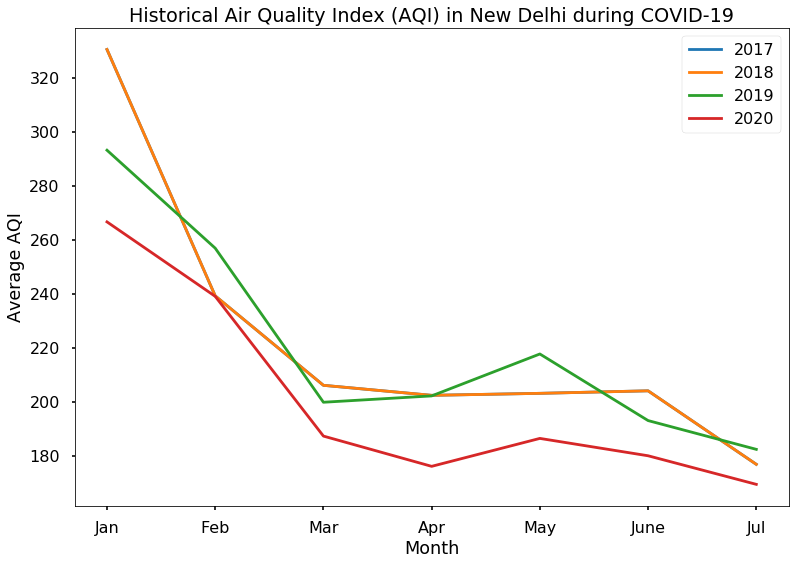

In [20]:
# fig= plt.figure(figsize=(9,7))
plt.style.use('seaborn-poster')
# plt.xkcd()
delhi_months["AQI"]["mean"].loc[2018].plot.line(label=2017)
delhi_months["AQI"]["mean"].loc[2018].plot.line(label=2018)
delhi_months["AQI"]["mean"].loc[2019].plot.line(label=2019)
delhi_months["AQI"]["mean"].loc[2020].plot.line(label=2020)
plt.title("Historical Air Quality Index (AQI) in New Delhi during COVID-19")
plt.ylabel("Average AQI")
plt.legend()
plt.show()

In [14]:
## Reference for specific data in df
# delhi_months["AQI"]["mean"]
# delhi_months["AQI"]["mean"].loc[2018]

In [15]:
## Testing how to plot categorical data
# new_delhi.groupby(["Year","Month","AQI"]).head().plot(x="Month", y="AQI")
# new_delhi.groupby(["Year","Month","Day","AQI"])["Levels of Concern"].apply(list)

In [16]:
# good = np.arange(51)
# moderate = np.arange(51,101)
# usg = np.arange(101,151)
# unhealthy = np.arange(151,201)
# vu = np.arange(201,301)
# haz = np.arange(301,501)
# data = {"Good":good,"Moderate":moderate,"Unhealthy SG":usg,"Unhealthy":unhealthy,"Very Unhealthy":vu,"Hazardous":haz}
# levels = pd.DataFrame(data=data )

In [17]:
# test_bins["AQI"].loc[2018,3][0:3]

In [18]:
# bins = [0,50,100,150,200,300,500]
# quality = ["1","2","3","4","5","6"]

# # place the data series into a new column inside of the DataFrame
# test_bins["Levels"]=pd.cut(test_bins["AQI"]["mean"], bins, labels=quality, include_lowest=True)
# levels = test_bins
# levels

In [19]:
# levels.Levels.plot(secondary_y=True, style='g')
# levels["Levels"]
# ax = levels["AQI"]["mean"].loc[2018].plot(secondary_y=levels['Levels'])
